<h2 align=center> Facial Expression Recognition</h2>

### Task 1: Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)



import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
from tensorflow.keras.preprocessing import image

C:\Users\IRON MAN\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Tensorflow version: 2.9.1


### directory

In [2]:
dataset_path = os.listdir('data')

label_types = os.listdir('data')
print (label_types)  

['angry 5.mp4', 'angry1.mp4', 'angry2.mp4', 'angry3.mp4', 'angry4.mp4', 'fear1.mp4', 'fear2.mp4', 'fear3.mp4', 'fear4.mp4', 'fear5.mp4', 'happy 2.mp4', 'happy1.mp4', 'happy3.mp4', 'happy4.mp4', 'happy5.mp4', 'hate1.mp4', 'hate2.mp4', 'hate3.mp4', 'hate4.mp4', 'hate5.mp4', 'neutrality1.mp4', 'neutrality2.mp4', 'neutrality3.mp4', 'neutrality4.mp4', 'neutrality5.mp4', 'sad1.mp4', 'sad2.mp4', 'sad3.mp4', 'sad4.mp4', 'sad5.mp4', 'surprise1.mp4', 'surprise2.mp4', 'surprise3.mp4', 'surprise4.mp4', 'surprise5.mp4', 't_new.csv']


# Preparing Training Data

rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('data' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('data' + '/' +item) + '/' + room))
    
# Build a dataframe        
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())

df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')


# read csv file

In [2]:
train_df = pd.read_csv('t.csv')
train_df.head()

,video_name,tag
0,data/angry 5.mp4,angry
1,data/angry1.mp4,angry
2,data/angry2.mp4,angry
3,data/angry3.mp4,angry
4,data/angry4.mp4,angry


### Feed the videos to a network:


In [3]:
for i in tqdm(range(train_df.shape[0])):
    count = 0
    videoFile = train_df['video_name'][i]
    cap = cv2.VideoCapture('data/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            filename ='train_1/' + videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:27<00:00,  1.29it/s]


In [4]:
# getting the names of all the images
images = glob("train_1/*.jpg")
train_image = []
train_class = []
for i in tqdm(range(len(images))):
    # creating the image name
    train_image.append(images[i])
    # creating the class of image
    train_class.append(images[i])
    
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class



100%|████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<?, ?it/s]


# converting the dataframe into csv file 
train_data.to_csv('data/t_new.csv',header=True, index=False)

In [5]:
train = pd.read_csv(r"C:\Users\IRON MAN\Desktop\cv111\data\t_new.csv")
train.head()

,image,class
0,angry1.mp4_frame0.jpg,angry
1,angry1.mp4_frame1.jpg,angry
2,angry1.mp4_frame10.jpg,angry
3,angry1.mp4_frame11.jpg,angry
4,angry1.mp4_frame12.jpg,angry


In [9]:
# creating an empty list
train_image = []

# for loop to read and store frames
for i in tqdm(range(train.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    img = image.load_img('train_1/'+train['image'][i], target_size=(48,48,3))
    img = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    


  0%|                                                                                          | 0/406 [00:00<?, ?it/s]


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [8]:
train_image

[array([[[0.6039216 , 0.5882353 , 0.5921569 ],
         [0.6       , 0.58431375, 0.5882353 ],
         [0.60784316, 0.5921569 , 0.59607846],
         ...,
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.6392157 , 0.6509804 , 0.6784314 ]],
 
        [[0.6039216 , 0.5882353 , 0.5921569 ],
         [0.6039216 , 0.5882353 , 0.5921569 ],
         [0.60784316, 0.5921569 , 0.59607846],
         ...,
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.6392157 , 0.6509804 , 0.6784314 ],
         [0.6392157 , 0.6509804 , 0.6784314 ]],
 
        [[0.59607846, 0.5882353 , 0.5921569 ],
         [0.59607846, 0.5882353 , 0.5921569 ],
         [0.6       , 0.5921569 , 0.59607846],
         ...,
         [0.6431373 , 0.654902  , 0.6901961 ],
         [0.6431373 , 0.654902  , 0.68235296],
         [0.6431373 , 0.654902  , 0.6901961 ]],
 
        ...,
 
        [[0.7058824 , 0.7176471 , 0.6901961 ],
         [0.7137255 , 0.7137255 , 0.71372

In [ ]:
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

In [12]:
# separating the target
y = train['class']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [13]:
print("Shape of the following:")
print("X_train =", X_train.shape, "\nX_test =", X_test.shape, "\ny_train =", y_train.shape, "\ny_test =", y_test.shape)

Shape of the following:
X_train = (324, 224, 224, 3) 
X_test = (82, 224, 224, 3) 
y_train = (324,) 
y_test = (82,)


In [14]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [15]:
X_train 

array([[[[0.61960787, 0.56078434, 0.47058824],
         [0.64705884, 0.58431375, 0.49411765],
         [0.65882355, 0.5882353 , 0.49411765],
         ...,
         [0.67058825, 0.6117647 , 0.45882353],
         [0.68235296, 0.6039216 , 0.46666667],
         [0.6745098 , 0.5882353 , 0.44313726]],

        [[0.6039216 , 0.5411765 , 0.4509804 ],
         [0.62352943, 0.56078434, 0.4627451 ],
         [0.64705884, 0.5686275 , 0.4745098 ],
         ...,
         [0.6784314 , 0.61960787, 0.46666667],
         [0.6784314 , 0.60784316, 0.46666667],
         [0.6627451 , 0.58431375, 0.4392157 ]],

        [[0.5921569 , 0.52156866, 0.42745098],
         [0.61960787, 0.5411765 , 0.44705883],
         [0.6392157 , 0.5529412 , 0.45882353],
         ...,
         [0.6784314 , 0.6156863 , 0.4745098 ],
         [0.6784314 , 0.60784316, 0.46666667],
         [0.65882355, 0.5882353 , 0.44705883]],

        ...,

        [[0.89411765, 0.9098039 , 0.8039216 ],
         [0.8901961 , 0.9098039 , 0.8235294 ]

In [ ]:
y_train

### Task 4: Create CNN Model

In [16]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(224, 224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     2

C:\Users\IRON MAN\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Task 6: Train and Evaluate Model

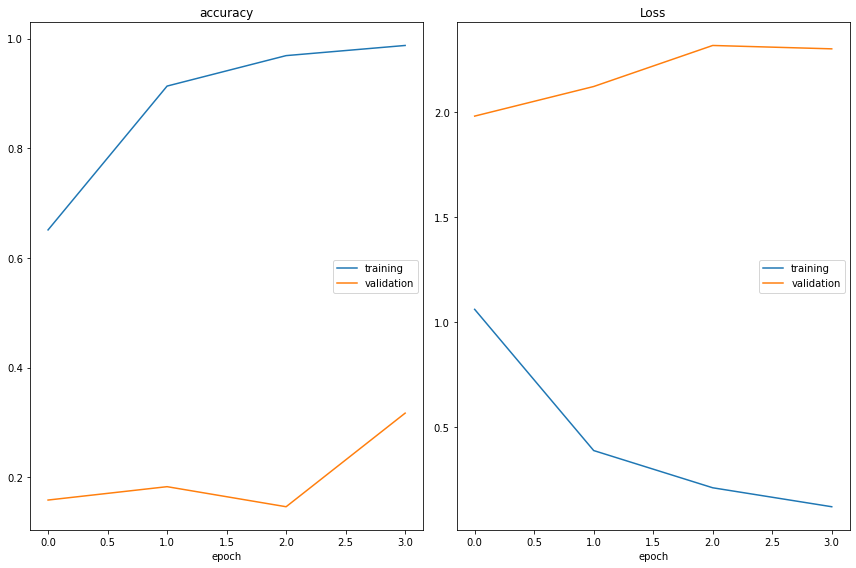

accuracy
	training         	 (min:    0.651, max:    0.988, cur:    0.988)
	validation       	 (min:    0.146, max:    0.317, cur:    0.317)
Loss
	training         	 (min:    0.120, max:    1.061, cur:    0.120)
	validation       	 (min:    1.981, max:    2.317, cur:    2.301)

Epoch 4: saving model to model_weights.h5
11/11 [==============================] - 204s 18s/step - loss: 0.1204 - accuracy: 0.9877 - val_loss: 2.3013 - val_accuracy: 0.3171 - lr: 5.0000e-05
Wall time: 15min 22s


In [17]:
%%time

epochs = 4


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(X_train,y_train,
    epochs=epochs,
    validation_data = (X_test,y_test),
    callbacks=callbacks
)

### Task 7: Represent Model as JSON String

In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)